In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [4]:
vaccinedata = pd.read_excel(r"/Users/milliegallacher/Desktop/University/Year 2/Data Skills/Report/vaccinedata.xlsx")

In [5]:
vaccinedata.head()

,NHS CCGs Represented,Region,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,Unnamed: 6,Location,Deaths From Flu,Population Size For Location/NHS Commissioning Group
0,NHS DERBY AND DERBYSHIRE CCG,NHS ENGLAND (EAST MIDLANDS),214579,162889,135727,62509,NaN,Derby & Derbyshire,545,780000
1,Combination of CCGs (Leicester City & East Lei...,NHS ENGLAND (EAST MIDLANDS),200781,146237,141546,56233,NaN,"Leicestershire, Leicester & Rutland (Leicester...",390,1107597
2,Combination of CCGs (East - West - South - Sou...,NHS ENGLAND (EAST MIDLANDS),184821,134570,98541,45378,NaN,Lincolnshire (East - West - South - South West),358,766333
3,Combination of following CCGs (Nottingham City...,NHS ENGLAND (EAST MIDLANDS),68468,49400,62202,25934,NaN,Nottingham (Nottingham City - Bassetlaw),129,337098
4,"Combination of CCGs (Nottingham West, North, E...",NHS ENGLAND (EAST MIDLANDS),147023,113123,88247,42300,NaN,"Nottinghamshire (Nottingham West, North, East ...",394,833377


In [6]:
vaccinedata["Population Size For Location/NHS Commissioning Group"] = pd.to_numeric(vaccinedata["Population Size For Location/NHS Commissioning Group"])

In [7]:
vaccinedata.isnull().sum()
#Nulls due to an empty column

NHS CCGs Represented                                     0
Region                                                   0
Patients 65 and over Registered                          0
Patients 65 and over Registered Vaccinated               0
Vulnerable patients under 65 Registered                  0
Vulnerable patients under 65 Vaccinated                  0
Unnamed: 6                                              94
Location                                                 0
Deaths From Flu                                          0
Population Size For Location/NHS Commissioning Group     0
dtype: int64

In [8]:
vaccinedata.set_index("NHS CCGs Represented", inplace = True)

In [9]:
vaccinedata["% over 65 Vaccinated"] = vaccinedata["Patients 65 and over Registered Vaccinated"]/vaccinedata["Patients 65 and over Registered"]*100
vaccinedata["% vulnerable under 65 Vaccinated"] = vaccinedata["Vulnerable patients under 65 Vaccinated"]/vaccinedata["Vulnerable patients under 65 Registered"]*100
vaccinedata["Death rate (Deaths/Registered)"] = vaccinedata["Deaths From Flu"]/(vaccinedata["Patients 65 and over Registered"] + vaccinedata["Vulnerable patients under 65 Registered"])

In [10]:
vaccinedata.drop(vaccinedata.columns[[5]], axis = 1, inplace = True)
#Empty column removed

In [366]:
vaccinedata.head()

,Region,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,Location,Deaths From Flu,Population Size For Location/NHS Commissioning Group,% over 65 Vaccinated,% vulnerable under 65 Vaccinated,Total patients over 65 and vulnerable under 65 registered
0,NHS ENGLAND (EAST MIDLANDS),214579,162889,135727,62509,Derby & Derbyshire,545,780000,75.910970,46.054949,350306
1,NHS ENGLAND (EAST MIDLANDS),200781,146237,141546,56233,"Leicestershire, Leicester & Rutland (Leicester...",390,1107597,72.834083,39.727721,342327
2,NHS ENGLAND (EAST MIDLANDS),184821,134570,98541,45378,Lincolnshire (East - West - South - South West),358,766333,72.810990,46.049868,283362
3,NHS ENGLAND (EAST MIDLANDS),68468,49400,62202,25934,Nottingham (Nottingham City - Bassetlaw),129,337098,72.150494,41.693193,130670
4,NHS ENGLAND (EAST MIDLANDS),147023,113123,88247,42300,"Nottinghamshire (Nottingham West, North, East ...",394,833377,76.942383,47.933641,235270


In [372]:
vacc = vaccinedata
vacc.reset_index(drop = True, inplace = True)

In [377]:
vacc["Deaths/100,000"] = (vacc.iloc[:,6]/vacc.iloc[:,7])*100000

In [379]:
vacc = vacc.drop(columns = ["Location"])

In [381]:
newpos = vacc.pop("Deaths From Flu")
vacc.insert(9, "Deaths From Flu", newpos)

In [383]:
newpos = vacc.pop("% over 65 Vaccinated")
vacc.insert(3, "% over 65 Vaccinated", newpos)

In [389]:

vacc.insert(6, "% vulnerable under 65 Vaccinated", newpos)

In [393]:
vacc["% over 65 and vulnerable under 65 vaccinated"] =( vacc.iloc[:,5] + vacc.iloc[:,2])/(vacc.iloc[:,1] + vacc.iloc[:,4])*100

In [399]:
newpos = vacc.pop("% over 65 and vulnerable under 65 vaccinated")
vacc.insert(8, "% over 65 and vulnerable under 65 vaccinated", newpos)

In [397]:
vacc = vacc.drop(columns = "Population Size For Location/NHS Commissioning Group")

In [401]:
vacc.set_index("Region", inplace = True)

In [403]:
vacc.groupby(["Region"]).mean()

,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,% over 65 Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,% vulnerable under 65 Vaccinated,Total patients over 65 and vulnerable under 65 registered,% over 65 and vulnerable under 65 vaccinated,Deaths From Flu,"Deaths/100,000"
Region,,,,,,,,,,
NHS ENGLAND (EAST MIDLANDS),118724.666667,87504.333333,72.988912,74622.222222,33167.222222,44.990705,193346.888889,62.032632,289.888889,47.309250
NHS ENGLAND (EAST),152092.888889,109269.666667,70.282571,95245.666667,40608.555556,41.804453,247338.555556,58.466075,277.111111,36.922949
NHS ENGLAND (LONDON),32622.687500,21400.125000,65.453070,35587.375000,14727.937500,40.950832,68210.062500,52.565590,69.062500,23.717960
NHS ENGLAND (NORTH EAST),54615.500000,40717.625000,74.340301,34384.125000,16647.375000,48.262884,88999.625000,64.187994,145.250000,52.767432
NHS ENGLAND (NORTH WEST),48409.000000,35602.666667,73.272845,39484.666667,18465.000000,46.802419,87893.666667,61.512329,132.250000,52.835545
NHS ENGLAND (SOUTH EAST),101563.545455,74433.454545,73.725307,61354.090909,28223.363636,46.787536,162917.636364,63.203214,209.818182,42.722551
NHS ENGLAND (SOUTH WEST),141638.888889,104333.666667,73.748335,76851.333333,35241.222222,46.019068,218490.222222,63.766284,339.111111,51.468104
NHS ENGLAND (WEST MIDLANDS),77330.125000,54378.250000,70.398800,60126.000000,26514.875000,45.385892,137456.125000,59.790248,230.625000,42.511288
NHS ENGLAND (YORKSHIRE AND HUMBER),71428.000000,52616.916667,73.376715,51385.333333,22993.666667,44.946526,122813.333333,61.457631,183.333333,44.273489


In [404]:
vacc.round(1)

,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,% over 65 Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,% vulnerable under 65 Vaccinated,Total patients over 65 and vulnerable under 65 registered,% over 65 and vulnerable under 65 vaccinated,Deaths From Flu,"Deaths/100,000"
Region,,,,,,,,,,
NHS ENGLAND (EAST MIDLANDS),214579,162889,75.9,135727,62509,46.1,350306,64.3,545,69.9
NHS ENGLAND (EAST MIDLANDS),200781,146237,72.8,141546,56233,39.7,342327,59.1,390,35.2
NHS ENGLAND (EAST MIDLANDS),184821,134570,72.8,98541,45378,46.0,283362,63.5,358,46.7
NHS ENGLAND (EAST MIDLANDS),68468,49400,72.2,62202,25934,41.7,130670,57.7,129,38.3
NHS ENGLAND (EAST MIDLANDS),147023,113123,76.9,88247,42300,47.9,235270,66.1,394,47.3
...,...,...,...,...,...,...,...,...,...,...
NHS ENGLAND (YORKSHIRE AND HUMBER),38301,27496,71.8,22118,9831,44.4,60419,61.8,91,54.3
NHS ENGLAND (YORKSHIRE AND HUMBER),106305,78442,73.8,51028,24291,47.6,157333,65.3,337,54.3
NHS ENGLAND (YORKSHIRE AND HUMBER),50936,38623,75.8,37187,17339,46.6,88123,63.5,137,51.7


In [362]:

vacc2 = vacc1[["Region", "Patients 65 and over Registered", "Patients 65 and over Registered Vaccinated", "% over 65 Vaccinated", "Vulnerable patients under 65 Registered","Vulnerable under 65 Vaccinated","% vulnerable under 65 Vaccinated","Total patients over 65 and vulnerable under 65 registered","Total patients over 65 and vulnerable under 65 registered vaccinated","% over 65 and vulnerable under 65 vaccinated","Deaths/100,000"]]

TypeError: 'NoneType' object is not subscriptable

In [406]:
vacc = vacc.groupby(["Region"]).mean()

In [408]:
vacc = vacc.round(1)

In [409]:
vacc

,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,% over 65 Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,% vulnerable under 65 Vaccinated,Total patients over 65 and vulnerable under 65 registered,% over 65 and vulnerable under 65 vaccinated,Deaths From Flu,"Deaths/100,000"
Region,,,,,,,,,,
NHS ENGLAND (EAST MIDLANDS),118724.7,87504.3,73.0,74622.2,33167.2,45.0,193346.9,62.0,289.9,47.3
NHS ENGLAND (EAST),152092.9,109269.7,70.3,95245.7,40608.6,41.8,247338.6,58.5,277.1,36.9
NHS ENGLAND (LONDON),32622.7,21400.1,65.5,35587.4,14727.9,41.0,68210.1,52.6,69.1,23.7
NHS ENGLAND (NORTH EAST),54615.5,40717.6,74.3,34384.1,16647.4,48.3,88999.6,64.2,145.2,52.8
NHS ENGLAND (NORTH WEST),48409.0,35602.7,73.3,39484.7,18465.0,46.8,87893.7,61.5,132.2,52.8
NHS ENGLAND (SOUTH EAST),101563.5,74433.5,73.7,61354.1,28223.4,46.8,162917.6,63.2,209.8,42.7
NHS ENGLAND (SOUTH WEST),141638.9,104333.7,73.7,76851.3,35241.2,46.0,218490.2,63.8,339.1,51.5
NHS ENGLAND (WEST MIDLANDS),77330.1,54378.2,70.4,60126.0,26514.9,45.4,137456.1,59.8,230.6,42.5
NHS ENGLAND (YORKSHIRE AND HUMBER),71428.0,52616.9,73.4,51385.3,22993.7,44.9,122813.3,61.5,183.3,44.3


In [336]:
#Regions split into separate dataframes if needed
east_midlands_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (EAST MIDLANDS)"]
east_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (EAST)"]
london_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (LONDON)"]
north_east_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (NORTH EAST)"]
north_west_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (NORTH WEST)"]
south_east_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (SOUTH EAST)"]
south_west_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (SOUTH WEST)"]
west_midlands_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (WEST MIDLANDS)"]
yorkshire_df = vaccinedata[vaccinedata["Region"] == "NHS ENGLAND (YORKSHIRE AND HUMBER)"]

In [13]:
print(east_midlands_df.mean(numeric_only = True))
print(east_df.mean(numeric_only = True))
print(london_df.mean(numeric_only = True))
print(north_east_df.mean(numeric_only = True))
print(north_west_df.mean(numeric_only = True))
print(south_east_df.mean(numeric_only = True))
print(south_west_df.mean(numeric_only = True))
print(west_midlands_df.mean(numeric_only = True))
print(yorkshire_df.mean(numeric_only = True))

Patients 65 and over Registered                         118724.666667
Patients 65 and over Registered Vaccinated               87504.333333
Vulnerable patients under 65 Registered                  74622.222222
Vulnerable patients under 65 Vaccinated                  33167.222222
Deaths From Flu                                            289.888889
Population Size For Location/NHS Commissioning Group    607881.777778
% over 65 Vaccinated                                        72.988912
% vulnerable under 65 Vaccinated                            44.990705
Death rate (Deaths/Registered)                               0.001542
dtype: float64
Patients 65 and over Registered                         152092.888889
Patients 65 and over Registered Vaccinated              109269.666667
Vulnerable patients under 65 Registered                  95245.666667
Vulnerable patients under 65 Vaccinated                  40608.555556
Deaths From Flu                                            277.111111
Popul

In [14]:
vaccinedata["Death rate (Deaths/Registered)"] = 100 *vaccinedata["Deaths From Flu"]/(vaccinedata["Patients 65 and over Registered"] + vaccinedata["Vulnerable patients under 65 Registered"])

In [15]:
vaccinedata["Death rate (Deaths/Registered)"]  = vaccinedata["Death rate (Deaths/Registered)"] .mul(100)

In [16]:
east_midlands_df.head()

,Region,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,Location,Deaths From Flu,Population Size For Location/NHS Commissioning Group,% over 65 Vaccinated,% vulnerable under 65 Vaccinated,Death rate (Deaths/Registered)
NHS CCGs Represented,,,,,,,,,,,
NHS DERBY AND DERBYSHIRE CCG,NHS ENGLAND (EAST MIDLANDS),214579,162889,135727,62509,Derby & Derbyshire,545,780000,75.910970,46.054949,0.001556
Combination of CCGs (Leicester City & East Leicestershire & Rutland),NHS ENGLAND (EAST MIDLANDS),200781,146237,141546,56233,"Leicestershire, Leicester & Rutland (Leicester...",390,1107597,72.834083,39.727721,0.001139
Combination of CCGs (East - West - South - South West),NHS ENGLAND (EAST MIDLANDS),184821,134570,98541,45378,Lincolnshire (East - West - South - South West),358,766333,72.810990,46.049868,0.001263
Combination of following CCGs (Nottingham City - Bassetlaw),NHS ENGLAND (EAST MIDLANDS),68468,49400,62202,25934,Nottingham (Nottingham City - Bassetlaw),129,337098,72.150494,41.693193,0.000987
"Combination of CCGs (Nottingham West, North, East + Mansfield & Ashfield + Newark & Sherwood + Rushcliffe)",NHS ENGLAND (EAST MIDLANDS),147023,113123,88247,42300,"Nottinghamshire (Nottingham West, North, East ...",394,833377,76.942383,47.933641,0.001675


In [17]:
#Mean for each particular variable for east midlands (test)
mean_overs_em = east_midlands_df["% over 65 Vaccinated"].mean()
mean_unders_em = east_midlands_df["% vulnerable under 65 Vaccinated"].mean()
mean_rate_em = east_midlands_df["Death rate (Deaths/Registered)"].mean()

In [18]:
#To make my dataframe I need to create a dictionary for each row 
row_east = {"Region" : "East",  "mean over 65 registered" : east_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" :east_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : east_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : east_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : east_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : east_df["Death rate (Deaths/Registered)"].mean()}
row_westmidlands  =  {"Region" : "West Midlands",  "mean over 65 registered" : west_midlands_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" :west_midlands_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : west_midlands_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : west_midlands_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : west_midlands_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : west_midlands_df["Death rate (Deaths/Registered)"].mean()}
row_eastmidlands =  {"Region" : "East Midlands",  "mean over 65 registered" : east_midlands_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" : east_midlands_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : east_midlands_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : east_midlands_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : east_midlands_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : east_midlands_df["Death rate (Deaths/Registered)"].mean()}
row_london =  {"Region" : "London",  "mean over 65 registered" : london_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" : london_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : london_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : london_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : london_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : london_df["Death rate (Deaths/Registered)"].mean()}
row_northeast =  {"Region" : "North East",  "mean over 65 registered" : north_east_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" : north_east_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : north_east_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : north_east_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : north_east_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : north_east_df["Death rate (Deaths/Registered)"].mean()}
row_northwest =  {"Region" : "North Westt",  "mean over 65 registered" : north_west_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" : north_west_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : north_west_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : north_west_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : north_west_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : north_west_df["Death rate (Deaths/Registered)"].mean()}
row_southeast =   {"Region" : "South East",  "mean over 65 registered" : south_east_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" : south_east_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : south_east_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : south_east_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : south_east_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : south_east_df["Death rate (Deaths/Registered)"].mean()}
row_southwest =   {"Region" : "South West",  "mean over 65 registered" : south_west_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" : south_west_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : south_west_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : south_west_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : south_west_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : south_west_df["Death rate (Deaths/Registered)"].mean()}
row_yorkshire =   {"Region" : "Yorkshire and Humber",  "mean over 65 registered" : yorkshire_df["Patients 65 and over Registered"].mean(), "mean % over 65 vaccinated" :yorkshire_df["% over 65 Vaccinated"].mean(), "mean vulnerable under 65 registered" : yorkshire_df["Vulnerable patients under 65 Registered"].mean(), "mean % vulnerable under 65 vaccinated" : yorkshire_df["% vulnerable under 65 Vaccinated"].mean(), "mean deaths from Flu" : yorkshire_df["Deaths From Flu"].mean(), "mean death rate (deaths/registered)" : yorkshire_df["Death rate (Deaths/Registered)"].mean()}

In [19]:
#This data has been created with the dictionary to show the mean values for each region but only columns deemed important
mean_data= pd.DataFrame([row_east, row_eastmidlands, row_london, row_northeast, row_northwest, row_southeast, row_southwest, row_westmidlands, row_yorkshire])

In [20]:
#This is the new dataframe as a table
mean_data.set_index("Region", inplace = True)
mean_data.head()

,mean over 65 registered,mean % over 65 vaccinated,mean vulnerable under 65 registered,mean % vulnerable under 65 vaccinated,mean deaths from Flu,mean death rate (deaths/registered)
Region,,,,,,
East,152092.888889,70.282571,95245.666667,41.804453,277.111111,0.001193
East Midlands,118724.666667,72.988912,74622.222222,44.990705,289.888889,0.001542
London,32622.687500,65.453070,35587.375000,40.950832,69.062500,0.000981
North East,54615.500000,74.340301,34384.125000,48.262884,145.250000,0.001623
North Westt,48409.000000,73.272845,39484.666667,46.802419,132.250000,0.001609


 # Expectations 
 
## What are you looking for from the first GLM?

You need to do some re-arranging of the data to support this. There will need to be two variables assigned to this analysis. You need to sort your data into three columns. The first will have the CGG names (which will listed for both the over 65 and then the under 65s), the second will assign people as either over 65 or under 65 and then the percentage of people vaccinated will be in the third column.

The variables you will then analyse will be age (this will split your data into two groups – over 65s and vulnerable under 65s) vs percentage vaccinated (The CCG information just helps with layout).  These will form your x and y variable – you will need to work out which is which.  From this you will need to undertake an appropriate test – again you will need to work out what that is.

## What are you looking for from the second GLM?
The second GLM is looking at percentage of people vaccinated in each CCG (created from both those over 65 and the vulnerable under 65 vaccinated) vs the deaths from flu/100,000 people within that specific CCG.
You will need to sort your data into three columns here i) NHS CCG, ii) percentage of people vaccinated (working out how many vulnerable under 65s and over 65s were vaccinated) and iii) deaths from flu/100,000 within each CCG.
Percentage of people vaccinated & deaths from flu/100,000 will form your x and y variables (you will need to work out which is x and which is y) and again an appropriate test will need to be undertaken comparing to the null model.

# Aim1

## Step One:
 Processing of data to convert given variables into percentage of vaccine uptake rates across:
-  65 and overs
- Vulnerable under 65s

In [21]:
vaccinedata.head(2)

,Region,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,Location,Deaths From Flu,Population Size For Location/NHS Commissioning Group,% over 65 Vaccinated,% vulnerable under 65 Vaccinated,Death rate (Deaths/Registered)
NHS CCGs Represented,,,,,,,,,,,
NHS DERBY AND DERBYSHIRE CCG,NHS ENGLAND (EAST MIDLANDS),214579,162889,135727,62509,Derby & Derbyshire,545,780000,75.910970,46.054949,15.557827
Combination of CCGs (Leicester City & East Leicestershire & Rutland),NHS ENGLAND (EAST MIDLANDS),200781,146237,141546,56233,"Leicestershire, Leicester & Rutland (Leicester...",390,1107597,72.834083,39.727721,11.392616


In [22]:
#col 1 = CCG, col 2 = age, col 3 = percentage vaccinated

over65_data = vaccinedata.copy()
over65_data = over65_data.drop(columns = ["Vulnerable patients under 65 Registered", "Vulnerable patients under 65 Vaccinated", "Location", "Region", "Deaths From Flu", "Population Size For Location/NHS Commissioning Group", "% vulnerable under 65 Vaccinated", "Death rate (Deaths/Registered)"])

In [23]:
over65_data["Age"] = "Over 65"
over65_data.head(2)

,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,% over 65 Vaccinated,Age
NHS CCGs Represented,,,,
NHS DERBY AND DERBYSHIRE CCG,214579,162889,75.910970,Over 65
Combination of CCGs (Leicester City & East Leicestershire & Rutland),200781,146237,72.834083,Over 65


In [24]:
under65_data = vaccinedata.copy()
under65_data = under65_data.drop(columns = ["Patients 65 and over Registered", "Patients 65 and over Registered Vaccinated", "Location", "Region", "Deaths From Flu", "Population Size For Location/NHS Commissioning Group", "% over 65 Vaccinated", "Death rate (Deaths/Registered)"])

In [25]:
under65_data["Age"] =  "Under 65"
under65_data.head(2)

,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,% vulnerable under 65 Vaccinated,Age
NHS CCGs Represented,,,,
NHS DERBY AND DERBYSHIRE CCG,135727,62509,46.054949,Under 65
Combination of CCGs (Leicester City & East Leicestershire & Rutland),141546,56233,39.727721,Under 65


In [26]:
frames = [over65_data, under65_data]
merged_data = pd.concat(frames)

In [27]:
merged_data.drop(columns = ["Patients 65 and over Registered", "Patients 65 and over Registered Vaccinated", "Vulnerable patients under 65 Vaccinated", "Vulnerable patients under 65 Registered"], inplace = True)

In [28]:
merged_data

,% over 65 Vaccinated,Age,% vulnerable under 65 Vaccinated
NHS CCGs Represented,,,
NHS DERBY AND DERBYSHIRE CCG,75.910970,Over 65,NaN
Combination of CCGs (Leicester City & East Leicestershire & Rutland),72.834083,Over 65,NaN
Combination of CCGs (East - West - South - South West),72.810990,Over 65,NaN
Combination of following CCGs (Nottingham City - Bassetlaw),72.150494,Over 65,NaN
"Combination of CCGs (Nottingham West, North, East + Mansfield & Ashfield + Newark & Sherwood + Rushcliffe)",76.942383,Over 65,NaN
...,...,...,...
NHS NORTH LINCOLNSHIRE CCG,NaN,Under 65,44.447961
"Combination of CCGs (Harrogate & Rural Districts - Hableton, Richmondshire & Whitby - Scarborugh & Ryedale)",NaN,Under 65,47.603277
NHS ROTHERHAM CCG,NaN,Under 65,46.626509


In [29]:
merged_data["% Patients vaccinated"] = merged_data["% vulnerable under 65 Vaccinated"].combine_first(merged_data["% over 65 Vaccinated"])
merged_data.drop(["% over 65 Vaccinated", "% vulnerable under 65 Vaccinated"], 1, inplace = True)

/var/folders/0y/jcw7d4891jg7bvyjf_g4xnmr0000gn/T/ipykernel_35350/3032702402.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  merged_data.drop(["% over 65 Vaccinated", "% vulnerable under 65 Vaccinated"], 1, inplace = True)


In [30]:
#This merged data provides the relevant columns for the first GLM
merged_data

,Age,% Patients vaccinated
NHS CCGs Represented,,
NHS DERBY AND DERBYSHIRE CCG,Over 65,75.910970
Combination of CCGs (Leicester City & East Leicestershire & Rutland),Over 65,72.834083
Combination of CCGs (East - West - South - South West),Over 65,72.810990
Combination of following CCGs (Nottingham City - Bassetlaw),Over 65,72.150494
"Combination of CCGs (Nottingham West, North, East + Mansfield & Ashfield + Newark & Sherwood + Rushcliffe)",Over 65,76.942383
...,...,...
NHS NORTH LINCOLNSHIRE CCG,Under 65,44.447961
"Combination of CCGs (Harrogate & Rural Districts - Hableton, Richmondshire & Whitby - Scarborugh & Ryedale)",Under 65,47.603277
NHS ROTHERHAM CCG,Under 65,46.626509


## Step Two:
Conduct appropriate GLM
- Evaluates if vaccination rates in the 65s and over differs from those in the vulnerable under 65 group across all NHS CCGs

In [31]:
#Data made into csv to use in R
merged_data.to_csv("mergeddata.csv", index = True)

In [32]:
merged_data

,Age,% Patients vaccinated
NHS CCGs Represented,,
NHS DERBY AND DERBYSHIRE CCG,Over 65,75.910970
Combination of CCGs (Leicester City & East Leicestershire & Rutland),Over 65,72.834083
Combination of CCGs (East - West - South - South West),Over 65,72.810990
Combination of following CCGs (Nottingham City - Bassetlaw),Over 65,72.150494
"Combination of CCGs (Nottingham West, North, East + Mansfield & Ashfield + Newark & Sherwood + Rushcliffe)",Over 65,76.942383
...,...,...
NHS NORTH LINCOLNSHIRE CCG,Under 65,44.447961
"Combination of CCGs (Harrogate & Rural Districts - Hableton, Richmondshire & Whitby - Scarborugh & Ryedale)",Under 65,47.603277
NHS ROTHERHAM CCG,Under 65,46.626509


### Code for GLM1 in R

### GLM

vaccinedata = read.csv(file.choose())
names(vaccinedata)[3] <- "Vaccinated"
vaccinedata_new = vaccinedata %>% drop_na("Vaccinated", "Age")
vaccinedata_glm <- lm(Vaccinated ~ Age, data = vaccinedata_new)
summary(vaccinedata_glm)
autoplot(vaccinedata_glm)

### Testing for Significance

first_null <- lm(Vaccinated ~ 1, data = vaccinedata_new)
anova(first_null, vaccinedata_glm, test = "F")


### Results of GLM1 in R

### GLM

Call:
lm(formula = Vaccinated ~ Age, data = vaccinedata_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.1754  -1.6959   0.3802   2.7504  13.2140 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.5863     0.4187  170.96   <2e-16 ***
AgeUnder 65 -26.7418     0.5922  -45.16   <2e-16 ***
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.06 on 186 degrees of freedom
Multiple R-squared:  0.9164,	Adjusted R-squared:  0.916 
F-statistic:  2039 on 1 and 186 DF,  p-value: < 2.2e-16

### Testing for Significance

Model 1: Vaccinated ~ 1
Model 2: Vaccinated ~ Age
  Res.Df   RSS Df Sum of Sq      F    Pr(>F)    
1    187 36677                                  
2    186  3066  1     33611 2039.2 < 2.2e-16 ***
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

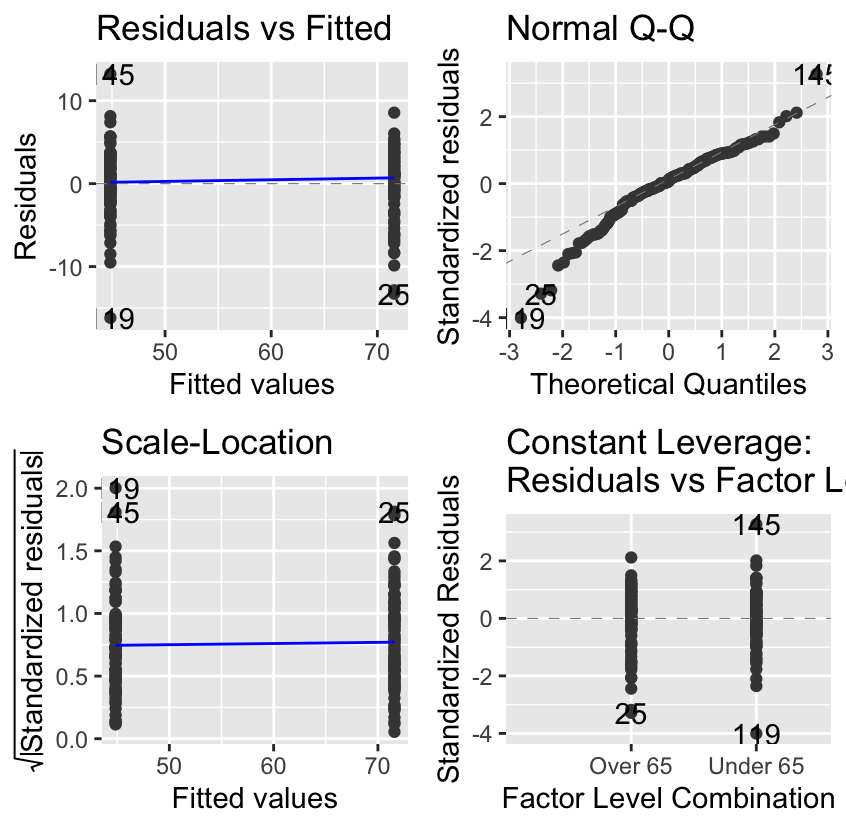

In [33]:
#Results of the first GLM image
display.Image("/Users/milliegallacher/Desktop/University/Year 2/Data Skills/Report/firstglm.png", width = "400")

## Step Three:
Create a summary table looking at vaccine uptake in over 65s and vulnerable under 65s split by the 9 NHS regions

In [187]:
summary_table = vaccinedata.reset_index(drop = True)

In [188]:
summary_table.drop(columns = ["Location", "Deaths From Flu", "Population Size For Location/NHS Commissioning Group", "Death rate (Deaths/Registered)"],  inplace = True )

In [189]:
grouped_table = pd.pivot_table(summary_table, index = "Region")

In [298]:
df = vaccinedata.reset_index(drop = True)
df1 = pd.pivot_table(df, index = "Region")

In [299]:
df1

,% over 65 Vaccinated,% vulnerable under 65 Vaccinated,Death rate (Deaths/Registered),Deaths From Flu,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Population Size For Location/NHS Commissioning Group,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated
Region,,,,,,,,,
NHS ENGLAND (EAST MIDLANDS),72.988912,44.990705,15.417423,289.888889,118724.666667,87504.333333,607881.777778,74622.222222,33167.222222
NHS ENGLAND (EAST),70.282571,41.804453,11.929318,277.111111,152092.888889,109269.666667,748411.222222,95245.666667,40608.555556
NHS ENGLAND (LONDON),65.453070,40.950832,9.810084,69.062500,32622.687500,21400.125000,286306.437500,35587.375000,14727.937500
NHS ENGLAND (NORTH EAST),74.340301,48.262884,16.232915,145.250000,54615.500000,40717.625000,284837.500000,34384.125000,16647.375000
NHS ENGLAND (NORTH WEST),73.272845,46.802419,16.093754,132.250000,48409.000000,35602.666667,279943.583333,39484.666667,18465.000000
NHS ENGLAND (SOUTH EAST),73.725307,46.787536,14.139120,209.818182,101563.545455,74433.454545,523153.909091,61354.090909,28223.363636
NHS ENGLAND (SOUTH WEST),73.748335,46.019068,15.085867,339.111111,141638.888889,104333.666667,645761.222222,76851.333333,35241.222222
NHS ENGLAND (WEST MIDLANDS),70.398800,45.385892,17.728335,230.625000,77330.125000,54378.250000,560015.250000,60126.000000,26514.875000
NHS ENGLAND (YORKSHIRE AND HUMBER),73.376715,44.946526,15.806202,183.333333,71428.000000,52616.916667,435897.500000,51385.333333,22993.666667


In [195]:
grouped_table["% over 65 Vaccinated"] = grouped_table["% over 65 Vaccinated"].round(1)
grouped_table["% vulnerable under 65 Vaccinated"] = grouped_table["% vulnerable under 65 Vaccinated"].round(1)

In [204]:
grouped_table.reset_index(inplace = True)

In [205]:
grouped_table.head(9)

,Region,% over 65 Vaccinated,% vulnerable under 65 Vaccinated,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated
0,NHS ENGLAND (EAST MIDLANDS),73.0,45.0,118724.666667,87504.333333,74622.222222,33167.222222
1,NHS ENGLAND (EAST),70.3,41.8,152092.888889,109269.666667,95245.666667,40608.555556
2,NHS ENGLAND (LONDON),65.5,41.0,32622.687500,21400.125000,35587.375000,14727.937500
3,NHS ENGLAND (NORTH EAST),74.3,48.3,54615.500000,40717.625000,34384.125000,16647.375000
4,NHS ENGLAND (NORTH WEST),73.3,46.8,48409.000000,35602.666667,39484.666667,18465.000000
5,NHS ENGLAND (SOUTH EAST),73.7,46.8,101563.545455,74433.454545,61354.090909,28223.363636
6,NHS ENGLAND (SOUTH WEST),73.7,46.0,141638.888889,104333.666667,76851.333333,35241.222222
7,NHS ENGLAND (WEST MIDLANDS),70.4,45.4,77330.125000,54378.250000,60126.000000,26514.875000
8,NHS ENGLAND (YORKSHIRE AND HUMBER),73.4,44.9,71428.000000,52616.916667,51385.333333,22993.666667


In [227]:
region_mapping = {"NHS ENGLAND (EAST MIDLANDS)": "East Midlands", "NHS ENGLAND (EAST)": "East", "NHS ENGLAND(LONDON)": "London", "NHS ENGLAND (NORTH EAST)":"North East", "NHS ENGLAND (NORTH WEST)":"North West ", "NHS ENGLAND (SOUTH EAST)":"South East", "NHS ENGLAND (SOUTH WEST)":"South West", "NHS ENGLAND (WEST MIDLANDS)": "West Midlands", "NHS ENGLAND (YORKSHIRE AND HUMBER)": "Yorkshire and Humber"}
grouped_table["Region"] = grouped_table["Region"].replace(region_mapping)
grouped_table["Region"] = grouped_table["Region"].replace({"NHS ENGLAND (LONDON)": "London"})

In [228]:
new_tables = vaccinedata.reset_index(drop = False)

In [229]:
new_tables.drop(columns = ["Location", "Deaths From Flu", "Population Size For Location/NHS Commissioning Group", "Death rate (Deaths/Registered)"],  inplace = True )

In [230]:
new_tables["% over 65 Vaccinated"] = new_tables["% over 65 Vaccinated"].round(1)
new_tables["% vulnerable under 65 Vaccinated"] = new_tables["% vulnerable under 65 Vaccinated"].round(1)

In [231]:
new_tables = new_tables.drop(labels=[new_tables.columns[2], new_tables.columns[3], new_tables.columns[4], new_tables.columns[5]], axis=1)

In [232]:
new_tables.head()

,NHS CCGs Represented,Region,% over 65 Vaccinated,% vulnerable under 65 Vaccinated
0,NHS DERBY AND DERBYSHIRE CCG,NHS ENGLAND (EAST MIDLANDS),75.9,46.1
1,Combination of CCGs (Leicester City & East Lei...,NHS ENGLAND (EAST MIDLANDS),72.8,39.7
2,Combination of CCGs (East - West - South - Sou...,NHS ENGLAND (EAST MIDLANDS),72.8,46.0
3,Combination of following CCGs (Nottingham City...,NHS ENGLAND (EAST MIDLANDS),72.2,41.7
4,"Combination of CCGs (Nottingham West, North, E...",NHS ENGLAND (EAST MIDLANDS),76.9,47.9


In [273]:
grouped_table

,Region,% over 65 Vaccinated,% vulnerable under 65 Vaccinated,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated
0,East Midlands,73.0,45.0,118724.666667,87504.333333,74622.222222,33167.222222
1,East,70.3,41.8,152092.888889,109269.666667,95245.666667,40608.555556
2,London,65.5,41.0,32622.687500,21400.125000,35587.375000,14727.937500
3,North East,74.3,48.3,54615.500000,40717.625000,34384.125000,16647.375000
4,North West,73.3,46.8,48409.000000,35602.666667,39484.666667,18465.000000
5,South East,73.7,46.8,101563.545455,74433.454545,61354.090909,28223.363636
6,South West,73.7,46.0,141638.888889,104333.666667,76851.333333,35241.222222
7,West Midlands,70.4,45.4,77330.125000,54378.250000,60126.000000,26514.875000
8,Yorkshire and Humber,73.4,44.9,71428.000000,52616.916667,51385.333333,22993.666667


In [280]:
grouped_table.describe()

,% over 65 Vaccinated,% vulnerable under 65 Vaccinated,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,71.955556,45.111111,88713.922489,64472.967172,58782.312570,26287.690867
std,2.815187,2.362967,42198.212083,31066.107537,20844.001252,8909.180365
min,65.500000,41.000000,32622.687500,21400.125000,34384.125000,14727.937500
25%,70.400000,44.900000,54615.500000,40717.625000,39484.666667,18465.000000
50%,73.300000,45.400000,77330.125000,54378.250000,60126.000000,26514.875000
75%,73.700000,46.800000,118724.666667,87504.333333,74622.222222,33167.222222
max,74.300000,48.300000,152092.888889,109269.666667,95245.666667,40608.555556


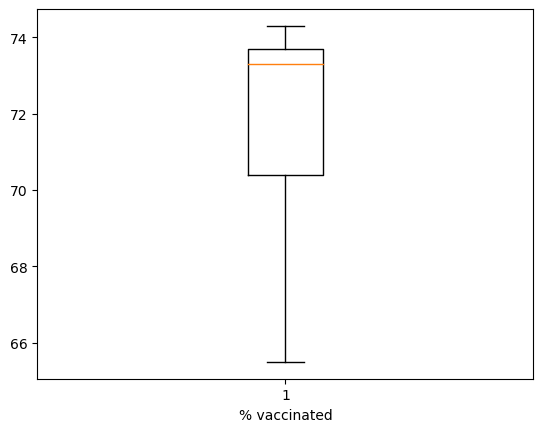

In [292]:
import matplotlib.pyplot as plt

# Get the data for the two age groups
ax = plt.axes()
bp = ax.boxplot(grouped_table["% over 65 Vaccinated"])
ax.set_xlabel("% vaccinated")
plt.show()

Text(0, 0.5, 'density')

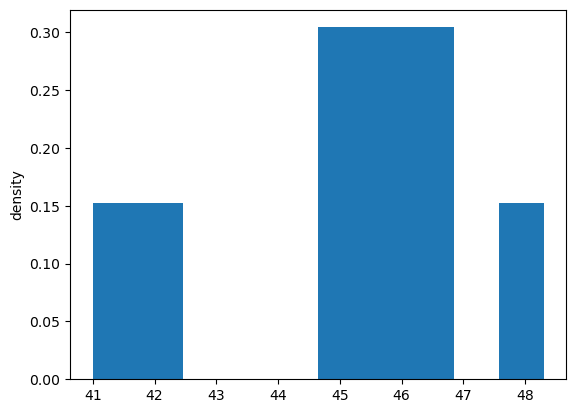

In [297]:
x = grouped_table["% vulnerable under 65 Vaccinated"]
plt.hist(x, density = True, bins = 10)
plt.ylabel("density")



In [251]:
region_mapping = {"NHS ENGLAND (EAST MIDLANDS)": "East Midlands", "NHS ENGLAND (EAST)": "East", "NHS ENGLAND(LONDON)": "London", "NHS ENGLAND (NORTH EAST)":"North East", "NHS ENGLAND (NORTH WEST)":"North West ", "NHS ENGLAND (SOUTH EAST)":"South East", "NHS ENGLAND (SOUTH WEST)":"South West", "NHS ENGLAND (WEST MIDLANDS)": "West Midlands", "NHS ENGLAND (YORKSHIRE AND HUMBER)": "Yorkshire and Humber"}
finaldata["Region"] = finaldata["Region"].replace(region_mapping)
finaldata["Region"] = finaldata["Region"].replace({"NHS ENGLAND (LONDON)": "London"})

(0.0, 89.16)

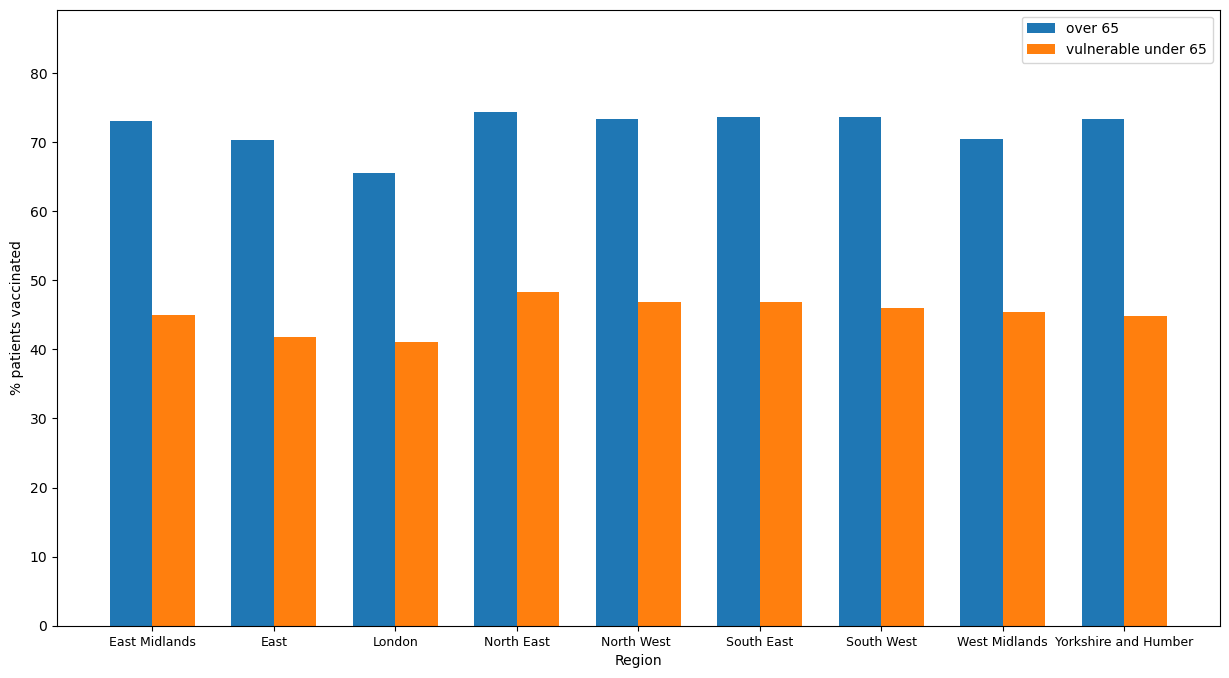

In [252]:
bar_width = 0.35

plt.figure(figsize=(15,8))
# Set the x-coordinates for the bars
x = np.arange(len(grouped_table.iloc[:,1]))

# Create the bar chart
plt.bar(x, grouped_table.iloc[:,1], bar_width, label="over 65")
plt.bar(x + bar_width, grouped_table.iloc[:,2], bar_width, label='vulnerable under 65')

plt.xlabel("Region")
plt.ylabel('% patients vaccinated')

plt.xticks(x + bar_width / 2,  grouped_table["Region"])
plt.xticks(fontsize = 9)

plt.legend()
plt.ylim(ymax=1.2*max(grouped_table.iloc[:,1].max(), grouped_table.iloc[:,2].max()))

In [216]:
new_tables.head()

,NHS CCGs Represented,Region,% over 65 Vaccinated,% vulnerable under 65 Vaccinated
0,NHS DERBY AND DERBYSHIRE CCG,NHS ENGLAND (EAST MIDLANDS),75.9,46.1
1,Combination of CCGs (Leicester City & East Lei...,NHS ENGLAND (EAST MIDLANDS),72.8,39.7
2,Combination of CCGs (East - West - South - Sou...,NHS ENGLAND (EAST MIDLANDS),72.8,46.0
3,Combination of following CCGs (Nottingham City...,NHS ENGLAND (EAST MIDLANDS),72.2,41.7
4,"Combination of CCGs (Nottingham West, North, E...",NHS ENGLAND (EAST MIDLANDS),76.9,47.9


# Aim 2

## Step One:
Create a new column working out overall vaccination rates in over 65s and vulnerable under 65s for all 94 locations.
Death rates from flu need to be presented as an appropriate measure across all CCGs e.g. deaths/100,000 population

In [41]:
vaccinedata.head(1)
#Need to add the patients registered together and calculate registered/vaccinated, then column of deaths/100,000

,Region,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,Location,Deaths From Flu,Population Size For Location/NHS Commissioning Group,% over 65 Vaccinated,% vulnerable under 65 Vaccinated,Death rate (Deaths/Registered)
NHS CCGs Represented,,,,,,,,,,,
NHS DERBY AND DERBYSHIRE CCG,NHS ENGLAND (EAST MIDLANDS),214579,162889,135727,62509,Derby & Derbyshire,545,780000,75.91097,46.054949,15.557827


In [42]:
second_data = pd.DataFrame()

In [43]:
second_data["% Patients of over 65 and under 65 vaccinated"] =  (100*(vaccinedata["Patients 65 and over Registered Vaccinated"]  + vaccinedata["Vulnerable patients under 65 Vaccinated"])/(vaccinedata["Patients 65 and over Registered"] + vaccinedata["Vulnerable patients under 65 Registered"]))

In [44]:
second_data["deaths per 100,000"] = (vaccinedata.iloc[:, 6] / vaccinedata.iloc[:, 7])*100000

In [410]:
#Dataframe for second GLM
second_data

,% Patients of over 65 and under 65 vaccinated,"deaths per 100,000",Region
NHS CCGs Represented,,,
NHS DERBY AND DERBYSHIRE CCG,64.343174,69.871795,NHS ENGLAND (EAST MIDLANDS)
Combination of CCGs (Leicester City & East Leicestershire & Rutland),59.145203,35.211363,NHS ENGLAND (EAST MIDLANDS)
Combination of CCGs (East - West - South - South West),63.504634,46.715984,NHS ENGLAND (EAST MIDLANDS)
Combination of following CCGs (Nottingham City - Bassetlaw),57.652101,38.267803,NHS ENGLAND (EAST MIDLANDS)
"Combination of CCGs (Nottingham West, North, East + Mansfield & Ashfield + Newark & Sherwood + Rushcliffe)",66.061546,47.277523,NHS ENGLAND (EAST MIDLANDS)
...,...,...,...
NHS NORTH LINCOLNSHIRE CCG,61.780235,54.345879,NHS ENGLAND (YORKSHIRE AND HUMBER)
"Combination of CCGs (Harrogate & Rural Districts - Hableton, Richmondshire & Whitby - Scarborugh & Ryedale)",65.296537,54.301413,NHS ENGLAND (YORKSHIRE AND HUMBER)
NHS ROTHERHAM CCG,63.504420,51.701235,NHS ENGLAND (YORKSHIRE AND HUMBER)


In [411]:
sec = second_data.drop(columns = "Region")

In [412]:
sec

,% Patients of over 65 and under 65 vaccinated,"deaths per 100,000"
NHS CCGs Represented,,
NHS DERBY AND DERBYSHIRE CCG,64.343174,69.871795
Combination of CCGs (Leicester City & East Leicestershire & Rutland),59.145203,35.211363
Combination of CCGs (East - West - South - South West),63.504634,46.715984
Combination of following CCGs (Nottingham City - Bassetlaw),57.652101,38.267803
"Combination of CCGs (Nottingham West, North, East + Mansfield & Ashfield + Newark & Sherwood + Rushcliffe)",66.061546,47.277523
...,...,...
NHS NORTH LINCOLNSHIRE CCG,61.780235,54.345879
"Combination of CCGs (Harrogate & Rural Districts - Hableton, Richmondshire & Whitby - Scarborugh & Ryedale)",65.296537,54.301413
NHS ROTHERHAM CCG,63.504420,51.701235


In [414]:
#For use in R
sec.to_csv("sec.csv", index = True)

## Step Two:
Conduct a GLM to determine if overall vaccination percentage in both the 65 and overs and vulnerable under 65s link with hospitalisation/death rates from flu across all 94 locations

### Code for GLM2 in R

### GLM

second_vaccinedata = read.csv(file.choose())
second_glm <- lm(DeathsPer100000 ~ PatientsVaccinated, data = second_vaccinedata)
summary(second_glm)
autoplot(second_glm)

### Testing for Significance 

second_null <- lm(DeathsPer100000 ~ 1, data = second_vaccinedata)
anova(second_null, second_glm, test = "F")

###  Results of GLM2 in R

### GLM

Call:
lm(formula = DeathsPer100000 ~ PatientsVaccinated, data = second_vaccinedata)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.863  -8.092  -1.240   4.741  94.011 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -57.4686    21.2256  -2.708  0.00808 ** 
PatientsVaccinated   1.6602     0.3511   4.728 8.14e-06 ***

Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.25 on 92 degrees of freedom
Multiple R-squared:  0.1955,	Adjusted R-squared:  0.1867 
F-statistic: 22.35 on 1 and 92 DF,  p-value: 8.138e-06

### Testing for Significance 

Model 1: DeathsPer100000 ~ 1
Model 2: DeathsPer100000 ~ PercentageVaccinated
  Res.Df   RSS Df Sum of Sq      F    Pr(>F)    
1     93 34011                                  
2     92 27362  1    6648.7 22.355 8.138e-06 ***
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

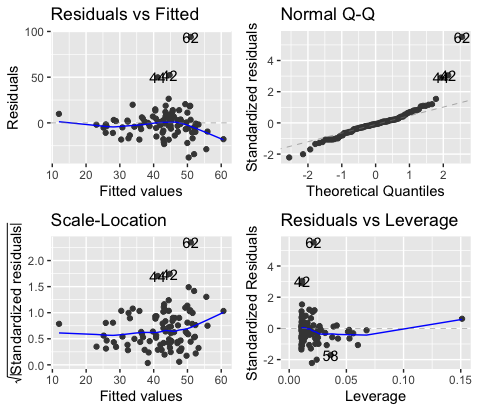

In [47]:
#Results of second GLM image
display.Image("/Users/milliegallacher/Desktop/University/Year 2/Data Skills/Report/glmplot2.png", width = "400")

## Step Three:
Provide at least one suitable data visualisation illustrating the outcome of your GLM

In [48]:
second_data

,% Patients of over 65 and under 65 vaccinated,"deaths per 100,000"
NHS CCGs Represented,,
NHS DERBY AND DERBYSHIRE CCG,64.343174,69.871795
Combination of CCGs (Leicester City & East Leicestershire & Rutland),59.145203,35.211363
Combination of CCGs (East - West - South - South West),63.504634,46.715984
Combination of following CCGs (Nottingham City - Bassetlaw),57.652101,38.267803
"Combination of CCGs (Nottingham West, North, East + Mansfield & Ashfield + Newark & Sherwood + Rushcliffe)",66.061546,47.277523
...,...,...
NHS NORTH LINCOLNSHIRE CCG,61.780235,54.345879
"Combination of CCGs (Harrogate & Rural Districts - Hableton, Richmondshire & Whitby - Scarborugh & Ryedale)",65.296537,54.301413
NHS ROTHERHAM CCG,63.504420,51.701235


In [49]:
#second_data but for over 65 and under 65 separately 
third_data = vaccinedata.drop(vaccinedata.columns[[0,  4]], axis = 1)

In [50]:
vaccinedata.head(2)

,Region,Patients 65 and over Registered,Patients 65 and over Registered Vaccinated,Vulnerable patients under 65 Registered,Vulnerable patients under 65 Vaccinated,Location,Deaths From Flu,Population Size For Location/NHS Commissioning Group,% over 65 Vaccinated,% vulnerable under 65 Vaccinated,Death rate (Deaths/Registered)
NHS CCGs Represented,,,,,,,,,,,
NHS DERBY AND DERBYSHIRE CCG,NHS ENGLAND (EAST MIDLANDS),214579,162889,135727,62509,Derby & Derbyshire,545,780000,75.910970,46.054949,15.557827
Combination of CCGs (Leicester City & East Leicestershire & Rutland),NHS ENGLAND (EAST MIDLANDS),200781,146237,141546,56233,"Leicestershire, Leicester & Rutland (Leicester...",390,1107597,72.834083,39.727721,11.392616


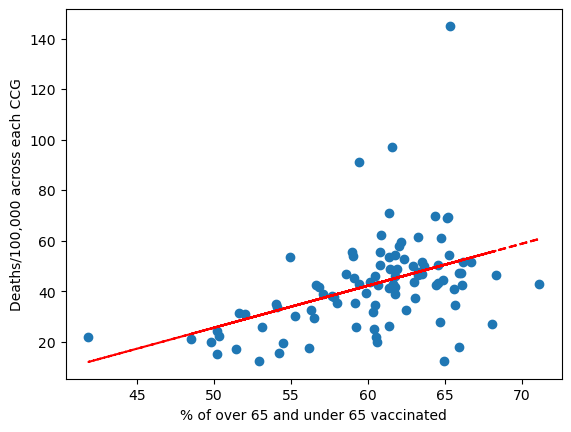

In [235]:
#This plot shows the result of the GLM
x = second_data["% Patients of over 65 and under 65 vaccinated"]
y  = second_data["deaths per 100,000"]
plt.scatter(x,y)
plt.xlabel("% of over 65 and under 65 vaccinated")
plt.ylabel("Deaths/100,000 across each CCG")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

In [259]:
second_data

,% Patients of over 65 and under 65 vaccinated,"deaths per 100,000",Region
NHS CCGs Represented,,,
NHS DERBY AND DERBYSHIRE CCG,64.343174,69.871795,NHS ENGLAND (EAST MIDLANDS)
Combination of CCGs (Leicester City & East Leicestershire & Rutland),59.145203,35.211363,NHS ENGLAND (EAST MIDLANDS)
Combination of CCGs (East - West - South - South West),63.504634,46.715984,NHS ENGLAND (EAST MIDLANDS)
Combination of following CCGs (Nottingham City - Bassetlaw),57.652101,38.267803,NHS ENGLAND (EAST MIDLANDS)
"Combination of CCGs (Nottingham West, North, East + Mansfield & Ashfield + Newark & Sherwood + Rushcliffe)",66.061546,47.277523,NHS ENGLAND (EAST MIDLANDS)
...,...,...,...
NHS NORTH LINCOLNSHIRE CCG,61.780235,54.345879,NHS ENGLAND (YORKSHIRE AND HUMBER)
"Combination of CCGs (Harrogate & Rural Districts - Hableton, Richmondshire & Whitby - Scarborugh & Ryedale)",65.296537,54.301413,NHS ENGLAND (YORKSHIRE AND HUMBER)
NHS ROTHERHAM CCG,63.504420,51.701235,NHS ENGLAND (YORKSHIRE AND HUMBER)


array([[<AxesSubplot:title={'center':'% Patients of over 65 and under 65 vaccinated'}>]],
      dtype=object)

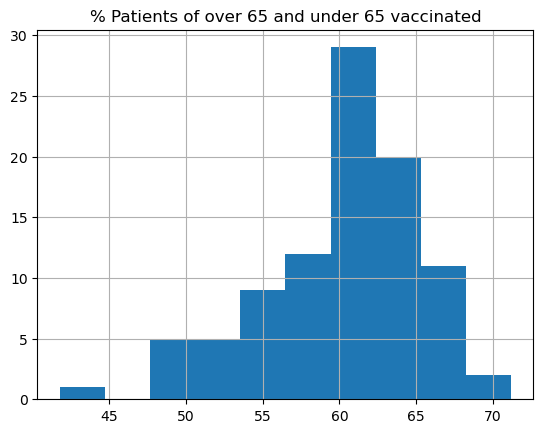

In [260]:
second_data.hist(column = "% Patients of over 65 and under 65 vaccinated")

array([[<AxesSubplot:title={'center':'deaths per 100,000'}>]],
      dtype=object)

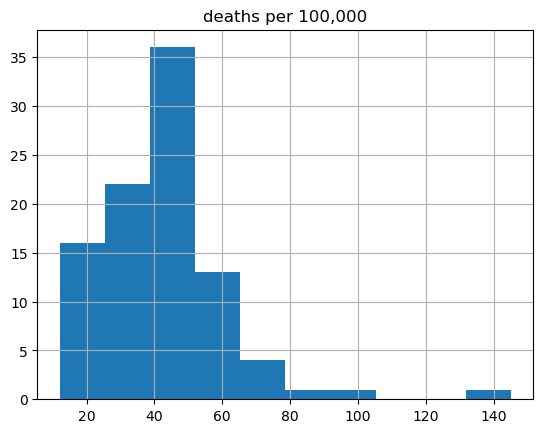

In [261]:
second_data.hist(column = "deaths per 100,000")

In [236]:
bar_data = second_data

In [256]:
second_data.head()

,% Patients of over 65 and under 65 vaccinated,"deaths per 100,000",Region
NHS CCGs Represented,,,
NHS DERBY AND DERBYSHIRE CCG,64.343174,69.871795,NHS ENGLAND (EAST MIDLANDS)
Combination of CCGs (Leicester City & East Leicestershire & Rutland),59.145203,35.211363,NHS ENGLAND (EAST MIDLANDS)
Combination of CCGs (East - West - South - South West),63.504634,46.715984,NHS ENGLAND (EAST MIDLANDS)
Combination of following CCGs (Nottingham City - Bassetlaw),57.652101,38.267803,NHS ENGLAND (EAST MIDLANDS)
"Combination of CCGs (Nottingham West, North, East + Mansfield & Ashfield + Newark & Sherwood + Rushcliffe)",66.061546,47.277523,NHS ENGLAND (EAST MIDLANDS)


In [239]:
bar_data["Region"] = vaccinedata["Region"]

In [246]:
finaldata = bar_data.groupby(["Region"]).mean()

In [248]:
finaldata.reset_index(inplace = True)

In [255]:
finaldata.describe()[["% Patients of over 65 and under 65 vaccinated", "deaths per 100,000"]]

,% Patients of over 65 and under 65 vaccinated,"deaths per 100,000"
count,9.000000,9.000000
mean,60.775777,43.836508
std,3.584325,9.265437
min,52.565590,23.717960
25%,59.790248,42.511288
50%,61.512329,44.273489
75%,63.203214,51.468104
max,64.187994,52.835545


In [272]:
finaldata.head()

,Region,% Patients of over 65 and under 65 vaccinated,"deaths per 100,000"
0,East Midlands,62.032632,47.309250
1,East,58.466075,36.922949
2,London,52.565590,23.717960
3,North East,64.187994,52.767432
4,North West,61.512329,52.835545


(0.0, 89.16)

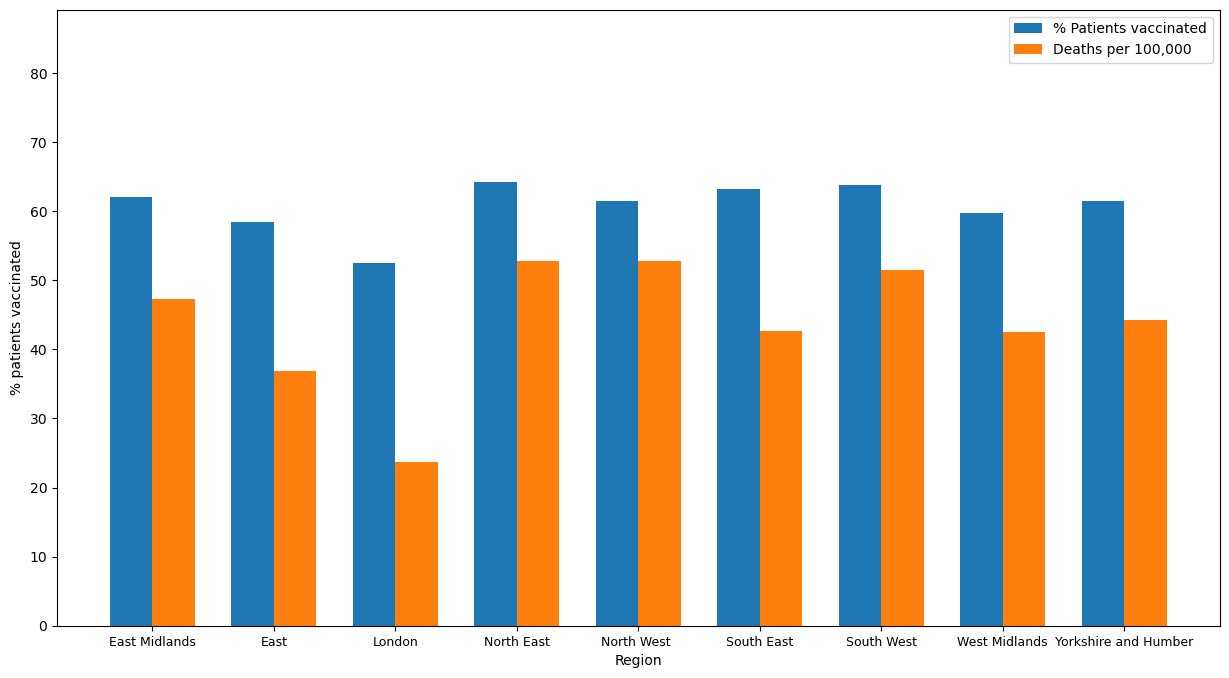

In [254]:
bar_width = 0.35

plt.figure(figsize=(15,8))
# Set the x-coordinates for the bars
x = np.arange(len(finaldata.iloc[:,1]))

# Create the bar chart
plt.bar(x, finaldata.iloc[:,1], bar_width, label="% Patients vaccinated")
plt.bar(x + bar_width, finaldata.iloc[:,2], bar_width, label='Deaths per 100,000')

plt.xlabel("Region")
plt.ylabel('% patients vaccinated')

plt.xticks(x + bar_width / 2,  finaldata["Region"])
plt.xticks(fontsize = 9)

plt.legend()
plt.ylim(ymax=1.2*max(grouped_table.iloc[:,1].max(), grouped_table.iloc[:,2].max()))

<AxesSubplot:>

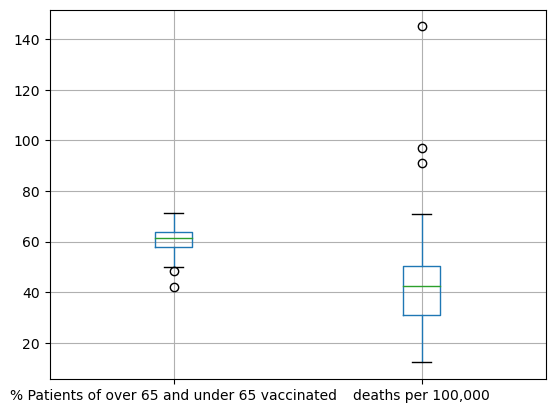

In [262]:
second_data.boxplot(column = ["% Patients of over 65 and under 65 vaccinated", "deaths per 100,000"])